# Sample KRR Example

Sample notebook to explore how KRR works for points on a 2d grid.

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.kernel_ridge import KernelRidge

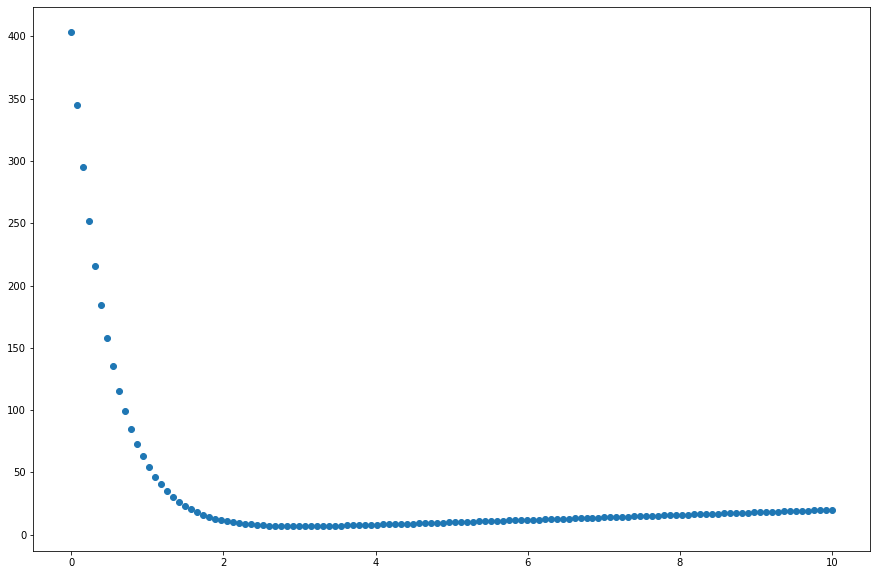

In [34]:
# Generate points by sampling from function

def func(x, a=-2, c=-3):
  return math.exp(a * (x + c)) - a * x

X = np.linspace(0, 10, 128)
y = np.array([func(x) for x in X])

f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X, y)
plt.show()

Clearly not enough sampling at lower values of $X$ so lets find the minima and remove 20% of the points from the right and move them to the left:

In [35]:
def sample():
    X = np.linspace(0, 10, 128)
    y = np.array([func(x) for x in X])  
    dydX = np.diff(y)/np.diff(X)
    minimum = X[np.argmin(abs(dydX))]
    right = [x for x in X if x >= minimum]
    left = [x for x in X if x < minimum]
    # Remove 20% of right
    n = len(right)
    right = random.sample(right, int(n*0.8))
    more_left = np.linspace(0, minimum, int(n*0.2))
    left = [*left, *more_left]
    print(len(right), len(left))
    X = [*right, *left]
    y = [func(x) for x in X]

    return X, y

72 56


In [ ]:
X, y = sample()

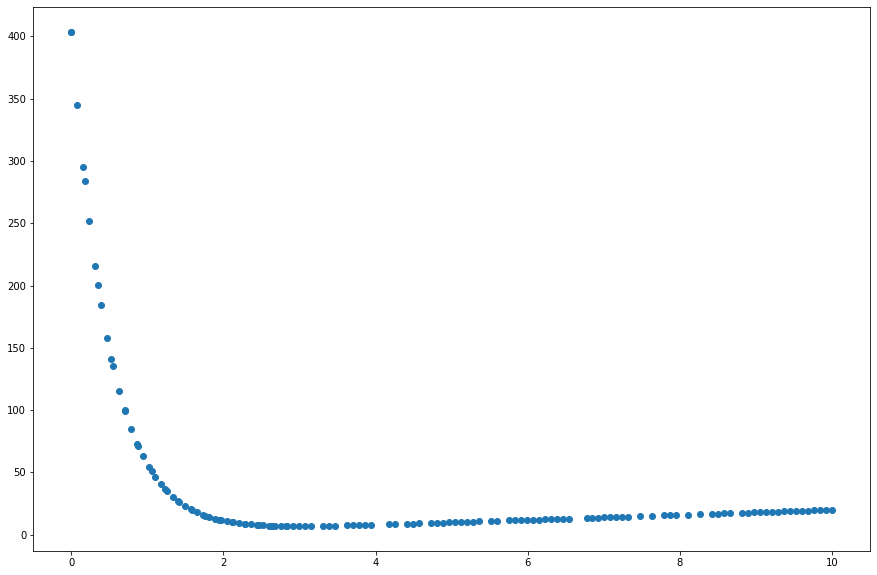

In [36]:
f, ax = plt.subplots(1,1, figsize=(15,10))
ax.scatter(X, y)
plt.show()

In [ ]:
krr = KernelRidge(alpha=1.0)
krr.fit()